In [2]:
#CKVGG19-1EXP

2024-10-18 11:01:21.300022: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 11:01:21.625288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 11:01:22.419941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.


2024-10-18 11:01:24.143104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 11:01:24.319989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 11:01:24.320145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created you can proceed to train you data with this model.


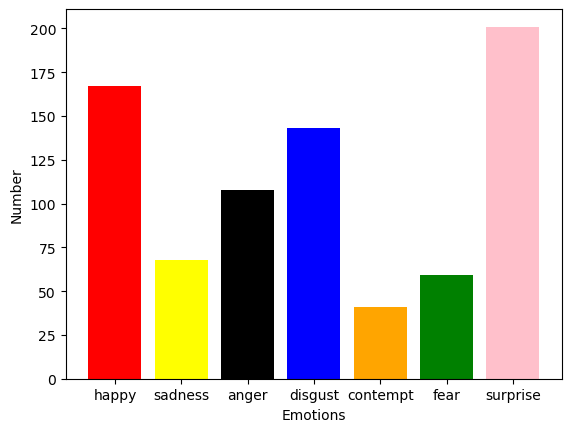

In [3]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [4]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    

Epoch 1/500


/tmp/ipykernel_4474/3806955214.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,
2024-10-18 11:01:27.589171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-18 11:01:28.091346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-18 11:01:28.105574: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7de47401b710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-18 11:01:28.105591: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-18 11:01:28.120544: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR 

12/12 [==============================] - 4s 41ms/step - loss: 1.7272 - accuracy: 0.4323 - val_loss: 3.4924 - val_accuracy: 0.4219
Epoch 2/500
12/12 [==============================] - 0s 38ms/step - loss: 0.9349 - accuracy: 0.6722 - val_loss: 1.7381 - val_accuracy: 0.5729
Epoch 3/500
12/12 [==============================] - 0s 25ms/step - loss: 0.6916 - accuracy: 0.7663 - val_loss: 1.0501 - val_accuracy: 0.6615
Epoch 4/500
12/12 [==============================] - 0s 25ms/step - loss: 0.5509 - accuracy: 0.8091 - val_loss: 0.8675 - val_accuracy: 0.6875
Epoch 5/500
12/12 [==============================] - 0s 22ms/step - loss: 0.4797 - accuracy: 0.8409 - val_loss: 0.6580 - val_accuracy: 0.7292
Epoch 6/500
12/12 [==============================] - 0s 25ms/step - loss: 0.3843 - accuracy: 0.8548 - val_loss: 0.5598 - val_accuracy: 0.7865
Epoch 7/500
12/12 [==============================] - 0s 23ms/step - loss: 0.2732 - accuracy: 0.9073 - val_loss: 0.4647 - val_accuracy: 0.8281
Epoch 8/500
12/12 

12/12 [==============================] - 0s 22ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.1293 - val_accuracy: 0.9740
Epoch 59/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.1321 - val_accuracy: 0.9583
Epoch 60/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0403 - accuracy: 0.9848 - val_loss: 0.1623 - val_accuracy: 0.9635
Epoch 61/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0540 - val_accuracy: 0.9844
Epoch 62/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0497 - accuracy: 0.9806 - val_loss: 0.0595 - val_accuracy: 0.9844
Epoch 63/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0516 - accuracy: 0.9848 - val_loss: 0.1239 - val_accuracy: 0.9740
Epoch 64/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0530 - accuracy: 0.9793 - val_loss: 0.0952 - val_accuracy: 0.9792
Epoch 65/500

12/12 [==============================] - 0s 22ms/step - loss: 0.0225 - accuracy: 0.9903 - val_loss: 0.1656 - val_accuracy: 0.9792
Epoch 116/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0229 - accuracy: 0.9917 - val_loss: 0.1673 - val_accuracy: 0.9792
Epoch 117/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0311 - accuracy: 0.9917 - val_loss: 0.1755 - val_accuracy: 0.9792
Epoch 118/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.1553 - val_accuracy: 0.9792
Epoch 119/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.1469 - val_accuracy: 0.9792
Epoch 120/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.1455 - val_accuracy: 0.9792
Epoch 121/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0212 - accuracy: 0.9959 - val_loss: 0.1532 - val_accuracy: 0.9740
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.3843 - val_accuracy: 0.9375
Epoch 173/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.2427 - val_accuracy: 0.9635
Epoch 174/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0421 - accuracy: 0.9848 - val_loss: 0.1702 - val_accuracy: 0.9688
Epoch 175/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0257 - accuracy: 0.9889 - val_loss: 0.1545 - val_accuracy: 0.9792
Epoch 176/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0281 - accuracy: 0.9903 - val_loss: 0.1715 - val_accuracy: 0.9635
Epoch 177/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0194 - accuracy: 0.9931 - val_loss: 0.1584 - val_accuracy: 0.9792
Epoch 178/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0179 - accuracy: 0.9972 - val_loss: 0.1805 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0192 - accuracy: 0.9931 - val_loss: 0.1679 - val_accuracy: 0.9792
Epoch 230/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0190 - accuracy: 0.9896 - val_loss: 0.1381 - val_accuracy: 0.9740
Epoch 231/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.1130 - val_accuracy: 0.9740
Epoch 232/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0091 - accuracy: 0.9959 - val_loss: 0.0883 - val_accuracy: 0.9792
Epoch 233/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0973 - val_accuracy: 0.9792
Epoch 234/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0287 - accuracy: 0.9903 - val_loss: 0.1479 - val_accuracy: 0.9792
Epoch 235/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.2831 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0203 - accuracy: 0.9917 - val_loss: 0.1600 - val_accuracy: 0.9792
Epoch 287/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.1484 - val_accuracy: 0.9792
Epoch 288/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0118 - accuracy: 0.9945 - val_loss: 0.1624 - val_accuracy: 0.9792
Epoch 289/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.2243 - val_accuracy: 0.9792
Epoch 290/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.2244 - val_accuracy: 0.9792
Epoch 291/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.2078 - val_accuracy: 0.9792
Epoch 292/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.2082 - val_accuracy:

Epoch 343/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0148 - accuracy: 0.9935 - val_loss: 0.0473 - val_accuracy: 0.9844
Epoch 344/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0846 - val_accuracy: 0.9844
Epoch 345/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0098 - accuracy: 0.9959 - val_loss: 0.1412 - val_accuracy: 0.9792
Epoch 346/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.1520 - val_accuracy: 0.9792
Epoch 347/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.1600 - val_accuracy: 0.9792
Epoch 348/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.1629 - val_accuracy: 0.9792
Epoch 349/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0120 - accuracy: 0.9945 - val_loss: 0.1881 - val_accuracy:

Epoch 400/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0277 - accuracy: 0.9931 - val_loss: 0.2644 - val_accuracy: 0.9531
Epoch 401/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0138 - accuracy: 0.9945 - val_loss: 0.2388 - val_accuracy: 0.9635
Epoch 402/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 0.2063 - val_accuracy: 0.9688
Epoch 403/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0252 - accuracy: 0.9945 - val_loss: 0.2539 - val_accuracy: 0.9688
Epoch 404/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0319 - accuracy: 0.9917 - val_loss: 0.1879 - val_accuracy: 0.9740
Epoch 405/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0316 - accuracy: 0.9876 - val_loss: 0.1245 - val_accuracy: 0.9896
Epoch 406/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0199 - accuracy: 0.9903 - val_loss: 0.1119 - val_accuracy:

Epoch 457/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0151 - accuracy: 0.9931 - val_loss: 0.1238 - val_accuracy: 0.9792
Epoch 458/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.1518 - val_accuracy: 0.9792
Epoch 459/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0088 - accuracy: 0.9986 - val_loss: 0.1748 - val_accuracy: 0.9740
Epoch 460/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0054 - accuracy: 0.9972 - val_loss: 0.1840 - val_accuracy: 0.9792
Epoch 461/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0296 - accuracy: 0.9889 - val_loss: 0.1666 - val_accuracy: 0.9792
Epoch 462/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0082 - accuracy: 0.9959 - val_loss: 0.1377 - val_accuracy: 0.9740
Epoch 463/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.1840 - val_accuracy:

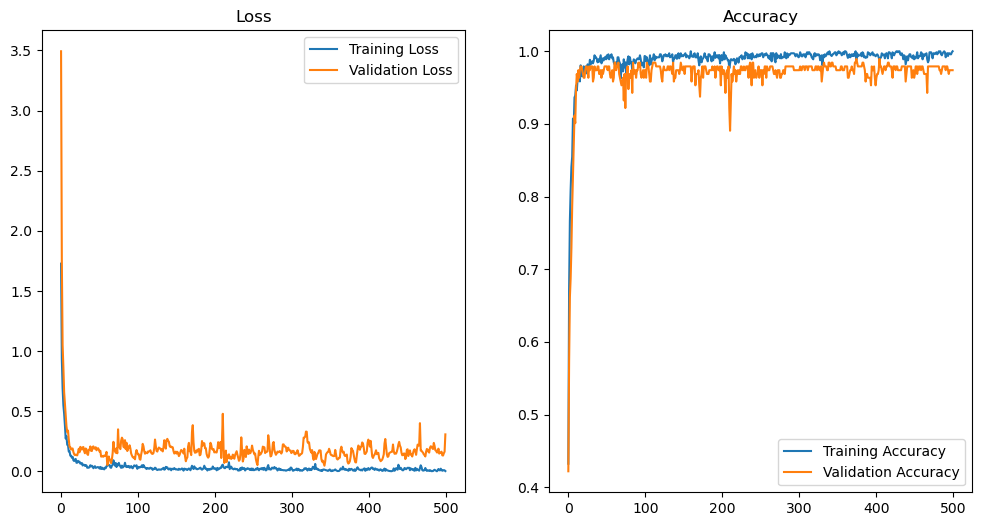

In [5]:

    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [6]:
#ckresnet--1exp

Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
CNN model has been created you can proceed to train you data with this model.


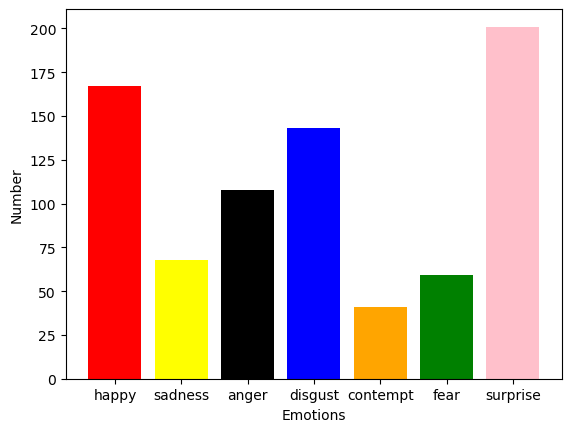

In [7]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [8]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    


Epoch 1/500


/tmp/ipykernel_4474/1281752000.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 8s 228ms/step - loss: 1.5780 - accuracy: 0.4924 - val_loss: 3.2374 - val_accuracy: 0.5208
Epoch 2/500
12/12 [==============================] - 0s 36ms/step - loss: 0.8620 - accuracy: 0.7095 - val_loss: 3.0825 - val_accuracy: 0.5417
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 0.6589 - accuracy: 0.7704 - val_loss: 1.6507 - val_accuracy: 0.6823
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 0.4857 - accuracy: 0.8285 - val_loss: 1.1240 - val_accuracy: 0.7031
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 0.3632 - accuracy: 0.8824 - val_loss: 0.7573 - val_accuracy: 0.7708
Epoch 6/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2595 - accuracy: 0.9101 - val_loss: 0.7256 - val_accuracy: 0.7865
Epoch 7/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2351 - accuracy: 0.9267 - val_loss: 0.6356 - val_accuracy: 0.8073
Epoch 8/500
12/12

12/12 [==============================] - 0s 30ms/step - loss: 0.0060 - accuracy: 0.9972 - val_loss: 0.1347 - val_accuracy: 0.9792
Epoch 59/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.3016 - val_accuracy: 0.9583
Epoch 60/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0819 - accuracy: 0.9793 - val_loss: 0.1209 - val_accuracy: 0.9635
Epoch 61/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.3240 - val_accuracy: 0.9375
Epoch 62/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0382 - accuracy: 0.9889 - val_loss: 0.2726 - val_accuracy: 0.9427
Epoch 63/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.2208 - val_accuracy: 0.9792
Epoch 64/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0224 - accuracy: 0.9959 - val_loss: 0.2151 - val_accuracy: 0.9531
Epoch 65/500

12/12 [==============================] - 0s 31ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.2694 - val_accuracy: 0.9688
Epoch 116/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.1707 - val_accuracy: 0.9792
Epoch 117/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0064 - accuracy: 0.9972 - val_loss: 0.1848 - val_accuracy: 0.9844
Epoch 118/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.2074 - val_accuracy: 0.9792
Epoch 119/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1783 - val_accuracy: 0.9792
Epoch 120/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1820 - val_accuracy: 0.9792
Epoch 121/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1852 - val_accuracy: 0.9740
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.1669 - val_accuracy: 0.9792
Epoch 173/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0134 - accuracy: 0.9931 - val_loss: 0.4377 - val_accuracy: 0.9688
Epoch 174/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0447 - accuracy: 0.9931 - val_loss: 0.3792 - val_accuracy: 0.9375
Epoch 175/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0152 - accuracy: 0.9959 - val_loss: 0.2506 - val_accuracy: 0.9583
Epoch 176/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.3130 - val_accuracy: 0.9583
Epoch 177/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0161 - accuracy: 0.9959 - val_loss: 0.3521 - val_accuracy: 0.9635
Epoch 178/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0167 - accuracy: 0.9959 - val_loss: 0.2694 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 30ms/step - loss: 6.2028e-04 - accuracy: 1.0000 - val_loss: 0.2986 - val_accuracy: 0.9844
Epoch 230/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9844
Epoch 231/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3130 - val_accuracy: 0.9740
Epoch 232/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.3593 - val_accuracy: 0.9740
Epoch 233/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.3260 - val_accuracy: 0.9740
Epoch 234/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0032 - accuracy: 0.9986 - val_loss: 0.3338 - val_accuracy: 0.9792
Epoch 235/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.3008 - val_accur

12/12 [==============================] - 0s 30ms/step - loss: 0.0029 - accuracy: 0.9986 - val_loss: 0.3552 - val_accuracy: 0.9792
Epoch 286/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 0.9792
Epoch 287/500
12/12 [==============================] - 0s 30ms/step - loss: 3.0092e-04 - accuracy: 1.0000 - val_loss: 0.2950 - val_accuracy: 0.9792
Epoch 288/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0029 - accuracy: 0.9986 - val_loss: 0.2896 - val_accuracy: 0.9792
Epoch 289/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2847 - val_accuracy: 0.9792
Epoch 290/500
12/12 [==============================] - 0s 30ms/step - loss: 4.3129e-04 - accuracy: 1.0000 - val_loss: 0.3279 - val_accuracy: 0.9792
Epoch 291/500
12/12 [==============================] - 0s 30ms/step - loss: 6.0581e-04 - accuracy: 1.0000 - val_loss: 0.3369 - val_accuracy: 0

12/12 [==============================] - 0s 30ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.4537 - val_accuracy: 0.9583
Epoch 342/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0178 - accuracy: 0.9903 - val_loss: 1.2133 - val_accuracy: 0.8490
Epoch 343/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0456 - accuracy: 0.9876 - val_loss: 0.4842 - val_accuracy: 0.9583
Epoch 344/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4395 - val_accuracy: 0.9583
Epoch 345/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0184 - accuracy: 0.9917 - val_loss: 0.4247 - val_accuracy: 0.9583
Epoch 346/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.3324 - val_accuracy: 0.9635
Epoch 347/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 1.1228 - val_accuracy: 0.8333
Epoch 

12/12 [==============================] - 0s 30ms/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.2584 - val_accuracy: 0.9792
Epoch 398/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0199 - accuracy: 0.9945 - val_loss: 0.3693 - val_accuracy: 0.9844
Epoch 399/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.3477 - val_accuracy: 0.9271
Epoch 400/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0829 - accuracy: 0.9820 - val_loss: 1.0397 - val_accuracy: 0.8854
Epoch 401/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0387 - accuracy: 0.9903 - val_loss: 0.5797 - val_accuracy: 0.9375
Epoch 402/500
12/12 [==============================] - 0s 30ms/step - loss: 0.1138 - accuracy: 0.9862 - val_loss: 0.6074 - val_accuracy: 0.9115
Epoch 403/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.4163 - val_accuracy: 0.9427
Epoch 

Epoch 454/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0015 - accuracy: 0.9986 - val_loss: 0.3287 - val_accuracy: 0.9792
Epoch 455/500
12/12 [==============================] - 0s 30ms/step - loss: 8.3478e-04 - accuracy: 1.0000 - val_loss: 0.3492 - val_accuracy: 0.9792
Epoch 456/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3642 - val_accuracy: 0.9792
Epoch 457/500
12/12 [==============================] - 0s 30ms/step - loss: 7.2465e-04 - accuracy: 1.0000 - val_loss: 0.3786 - val_accuracy: 0.9792
Epoch 458/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.3960 - val_accuracy: 0.9792
Epoch 459/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 0.9987 - val_loss: 0.4136 - val_accuracy: 0.9792
Epoch 460/500
12/12 [==============================] - 0s 30ms/step - loss: 2.8997e-04 - accuracy: 1.0000 - val_loss: 0.4197 - v

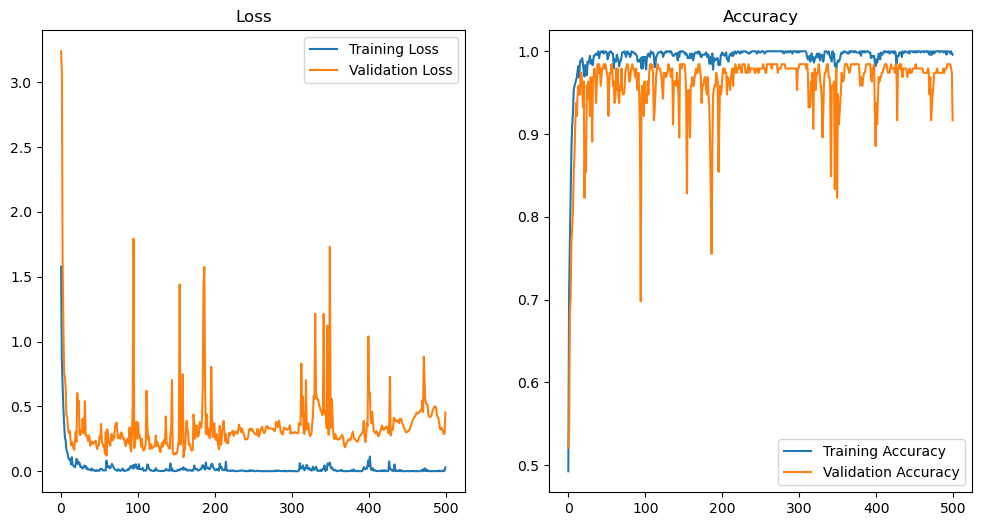

In [9]:
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [10]:
#JAFFEVGG19---1EXP

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.


/home/rajesh/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


CNN model has been created you can proceed to train you data with this model.


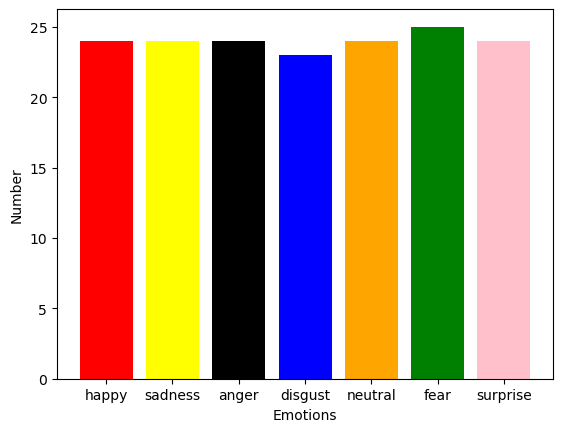

In [11]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [12]:



# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)



Epoch 1/500


2024-10-18 11:07:21.168988: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-18 11:07:21.189187: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-18 11:07:21.289467: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-18 11:07:21.289497: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

3/3 [==============================] - 15s 4s/step - loss: 2.9313 - accuracy: 0.1607 - val_loss: 3.2379 - val_accuracy: 0.1556
Epoch 2/500
3/3 [==============================] - 2s 618ms/step - loss: 2.4663 - accuracy: 0.2917 - val_loss: 4.4947 - val_accuracy: 0.1556
Epoch 3/500
3/3 [==============================] - 2s 620ms/step - loss: 2.2027 - accuracy: 0.3452 - val_loss: 4.8553 - val_accuracy: 0.2000
Epoch 4/500
3/3 [==============================] - 2s 459ms/step - loss: 1.9163 - accuracy: 0.3214 - val_loss: 5.3604 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 482ms/step - loss: 1.9664 - accuracy: 0.3869 - val_loss: 5.7627 - val_accuracy: 0.1333
Epoch 6/500
3/3 [==============================] - 2s 624ms/step - loss: 1.7499 - accuracy: 0.3571 - val_loss: 5.1684 - val_accuracy: 0.1556
Epoch 7/500
3/3 [==============================] - 2s 624ms/step - loss: 1.7160 - accuracy: 0.3988 - val_loss: 4.8677 - val_accuracy: 0.2444
Epoch 8/500
3/3 [==========

Epoch 59/500
3/3 [==============================] - 2s 749ms/step - loss: 0.3658 - accuracy: 0.8690 - val_loss: 1.1782 - val_accuracy: 0.7111
Epoch 60/500
3/3 [==============================] - 2s 568ms/step - loss: 0.3403 - accuracy: 0.8631 - val_loss: 0.9627 - val_accuracy: 0.7333
Epoch 61/500
3/3 [==============================] - 2s 696ms/step - loss: 0.4503 - accuracy: 0.8512 - val_loss: 0.9043 - val_accuracy: 0.7111
Epoch 62/500
3/3 [==============================] - 2s 522ms/step - loss: 0.3558 - accuracy: 0.8750 - val_loss: 0.8568 - val_accuracy: 0.7778
Epoch 63/500
3/3 [==============================] - 2s 704ms/step - loss: 0.2425 - accuracy: 0.9107 - val_loss: 0.8069 - val_accuracy: 0.7778
Epoch 64/500
3/3 [==============================] - 2s 755ms/step - loss: 0.2742 - accuracy: 0.8988 - val_loss: 0.7701 - val_accuracy: 0.8000
Epoch 65/500
3/3 [==============================] - 2s 576ms/step - loss: 0.2660 - accuracy: 0.9345 - val_loss: 0.7356 - val_accuracy: 0.8222
Epoch 

3/3 [==============================] - 2s 815ms/step - loss: 0.1661 - accuracy: 0.9286 - val_loss: 0.9511 - val_accuracy: 0.8222
Epoch 117/500
3/3 [==============================] - 2s 795ms/step - loss: 0.2212 - accuracy: 0.9226 - val_loss: 1.0028 - val_accuracy: 0.8444
Epoch 118/500
3/3 [==============================] - 2s 796ms/step - loss: 0.2800 - accuracy: 0.9167 - val_loss: 0.9542 - val_accuracy: 0.8444
Epoch 119/500
3/3 [==============================] - 2s 783ms/step - loss: 0.1931 - accuracy: 0.9464 - val_loss: 0.9601 - val_accuracy: 0.8444
Epoch 120/500
3/3 [==============================] - 2s 748ms/step - loss: 0.2502 - accuracy: 0.9167 - val_loss: 0.9862 - val_accuracy: 0.8444
Epoch 121/500
3/3 [==============================] - 2s 766ms/step - loss: 0.2108 - accuracy: 0.8988 - val_loss: 0.9287 - val_accuracy: 0.8667
Epoch 122/500
3/3 [==============================] - 2s 542ms/step - loss: 0.2214 - accuracy: 0.9286 - val_loss: 0.9201 - val_accuracy: 0.8444
Epoch 123/500

3/3 [==============================] - 2s 588ms/step - loss: 0.1096 - accuracy: 0.9702 - val_loss: 0.9092 - val_accuracy: 0.8444
Epoch 174/500
3/3 [==============================] - 2s 453ms/step - loss: 0.1424 - accuracy: 0.9524 - val_loss: 0.9551 - val_accuracy: 0.8000
Epoch 175/500
3/3 [==============================] - 2s 451ms/step - loss: 0.0956 - accuracy: 0.9583 - val_loss: 0.9613 - val_accuracy: 0.8444
Epoch 176/500
3/3 [==============================] - 2s 595ms/step - loss: 0.1563 - accuracy: 0.9524 - val_loss: 0.9345 - val_accuracy: 0.8667
Epoch 177/500
3/3 [==============================] - 2s 467ms/step - loss: 0.1119 - accuracy: 0.9643 - val_loss: 0.8442 - val_accuracy: 0.8889
Epoch 178/500
3/3 [==============================] - 2s 594ms/step - loss: 0.1777 - accuracy: 0.9167 - val_loss: 0.7380 - val_accuracy: 0.8667
Epoch 179/500
3/3 [==============================] - 2s 442ms/step - loss: 0.1363 - accuracy: 0.9583 - val_loss: 0.6223 - val_accuracy: 0.8444
Epoch 180/500

3/3 [==============================] - 2s 450ms/step - loss: 0.1495 - accuracy: 0.9524 - val_loss: 1.2089 - val_accuracy: 0.7333
Epoch 231/500
3/3 [==============================] - 2s 455ms/step - loss: 0.0953 - accuracy: 0.9643 - val_loss: 1.0557 - val_accuracy: 0.7333
Epoch 232/500
3/3 [==============================] - 2s 600ms/step - loss: 0.0892 - accuracy: 0.9524 - val_loss: 0.9889 - val_accuracy: 0.7333
Epoch 233/500
3/3 [==============================] - 2s 452ms/step - loss: 0.1112 - accuracy: 0.9583 - val_loss: 1.0368 - val_accuracy: 0.7333
Epoch 234/500
3/3 [==============================] - 2s 603ms/step - loss: 0.0735 - accuracy: 0.9821 - val_loss: 1.0883 - val_accuracy: 0.7556
Epoch 235/500
3/3 [==============================] - 2s 450ms/step - loss: 0.1190 - accuracy: 0.9583 - val_loss: 1.0942 - val_accuracy: 0.7778
Epoch 236/500
3/3 [==============================] - 2s 457ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 1.0374 - val_accuracy: 0.8000
Epoch 237/500

3/3 [==============================] - 2s 586ms/step - loss: 0.0943 - accuracy: 0.9524 - val_loss: 1.4310 - val_accuracy: 0.8222
Epoch 288/500
3/3 [==============================] - 2s 473ms/step - loss: 0.0854 - accuracy: 0.9643 - val_loss: 1.4304 - val_accuracy: 0.8222
Epoch 289/500
3/3 [==============================] - 2s 468ms/step - loss: 0.0770 - accuracy: 0.9524 - val_loss: 1.4713 - val_accuracy: 0.8222
Epoch 290/500
3/3 [==============================] - 2s 452ms/step - loss: 0.0957 - accuracy: 0.9583 - val_loss: 1.4700 - val_accuracy: 0.8222
Epoch 291/500
3/3 [==============================] - 2s 463ms/step - loss: 0.1200 - accuracy: 0.9345 - val_loss: 1.4375 - val_accuracy: 0.8222
Epoch 292/500
3/3 [==============================] - 2s 596ms/step - loss: 0.1279 - accuracy: 0.9464 - val_loss: 1.3323 - val_accuracy: 0.8222
Epoch 293/500
3/3 [==============================] - 2s 448ms/step - loss: 0.1813 - accuracy: 0.9643 - val_loss: 1.2241 - val_accuracy: 0.8444
Epoch 294/500

3/3 [==============================] - 2s 446ms/step - loss: 0.0583 - accuracy: 0.9940 - val_loss: 0.9794 - val_accuracy: 0.8667
Epoch 345/500
3/3 [==============================] - 2s 589ms/step - loss: 0.0815 - accuracy: 0.9702 - val_loss: 0.9539 - val_accuracy: 0.8667
Epoch 346/500
3/3 [==============================] - 2s 599ms/step - loss: 0.1228 - accuracy: 0.9643 - val_loss: 0.8919 - val_accuracy: 0.8667
Epoch 347/500
3/3 [==============================] - 2s 481ms/step - loss: 0.0962 - accuracy: 0.9643 - val_loss: 0.8988 - val_accuracy: 0.8667
Epoch 348/500
3/3 [==============================] - 2s 451ms/step - loss: 0.1326 - accuracy: 0.9583 - val_loss: 0.8409 - val_accuracy: 0.8667
Epoch 349/500
3/3 [==============================] - 2s 445ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.8186 - val_accuracy: 0.8889
Epoch 350/500
3/3 [==============================] - 2s 473ms/step - loss: 0.0816 - accuracy: 0.9702 - val_loss: 0.8809 - val_accuracy: 0.8889
Epoch 351/500

3/3 [==============================] - 2s 460ms/step - loss: 0.0599 - accuracy: 0.9762 - val_loss: 1.2906 - val_accuracy: 0.8667
Epoch 402/500
3/3 [==============================] - 2s 588ms/step - loss: 0.1483 - accuracy: 0.9405 - val_loss: 1.2302 - val_accuracy: 0.8667
Epoch 403/500
3/3 [==============================] - 2s 458ms/step - loss: 0.0681 - accuracy: 0.9821 - val_loss: 1.2076 - val_accuracy: 0.8444
Epoch 404/500
3/3 [==============================] - 2s 449ms/step - loss: 0.1007 - accuracy: 0.9583 - val_loss: 1.2184 - val_accuracy: 0.8222
Epoch 405/500
3/3 [==============================] - 2s 591ms/step - loss: 0.0928 - accuracy: 0.9524 - val_loss: 1.2221 - val_accuracy: 0.8222
Epoch 406/500
3/3 [==============================] - 2s 596ms/step - loss: 0.0412 - accuracy: 0.9762 - val_loss: 1.1644 - val_accuracy: 0.8444
Epoch 407/500
3/3 [==============================] - 2s 588ms/step - loss: 0.1252 - accuracy: 0.9464 - val_loss: 1.1448 - val_accuracy: 0.8444
Epoch 408/500

3/3 [==============================] - 2s 597ms/step - loss: 0.0629 - accuracy: 0.9821 - val_loss: 1.0081 - val_accuracy: 0.8667
Epoch 459/500
3/3 [==============================] - 2s 447ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 1.0490 - val_accuracy: 0.8667
Epoch 460/500
3/3 [==============================] - 2s 480ms/step - loss: 0.0542 - accuracy: 0.9762 - val_loss: 1.0451 - val_accuracy: 0.8667
Epoch 461/500
3/3 [==============================] - 2s 595ms/step - loss: 0.1042 - accuracy: 0.9524 - val_loss: 1.0616 - val_accuracy: 0.8667
Epoch 462/500
3/3 [==============================] - 2s 456ms/step - loss: 0.0475 - accuracy: 0.9821 - val_loss: 1.1042 - val_accuracy: 0.8889
Epoch 463/500
3/3 [==============================] - 2s 445ms/step - loss: 0.0854 - accuracy: 0.9643 - val_loss: 1.1412 - val_accuracy: 0.8889
Epoch 464/500
3/3 [==============================] - 2s 447ms/step - loss: 0.0585 - accuracy: 0.9702 - val_loss: 1.1657 - val_accuracy: 0.8889
Epoch 465/500

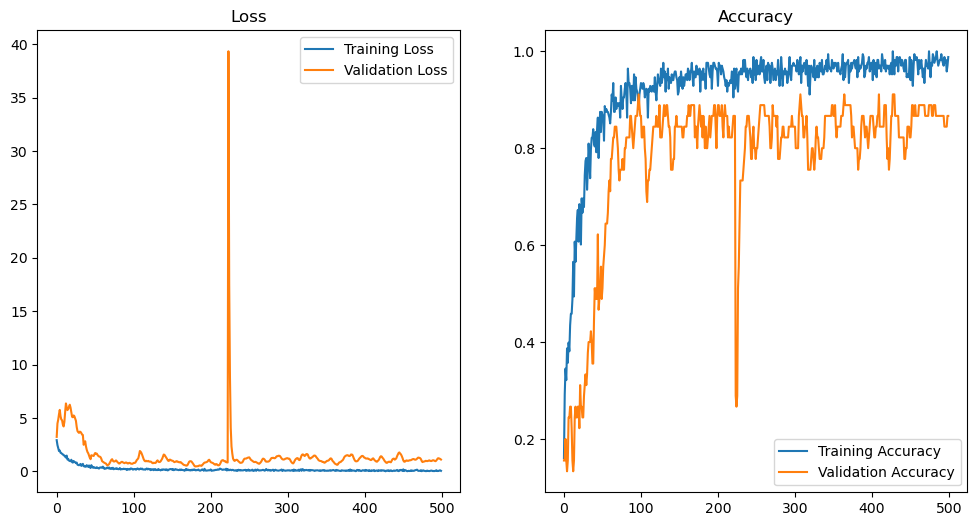

In [13]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [14]:
#JAFFE RESENET----EXP2

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


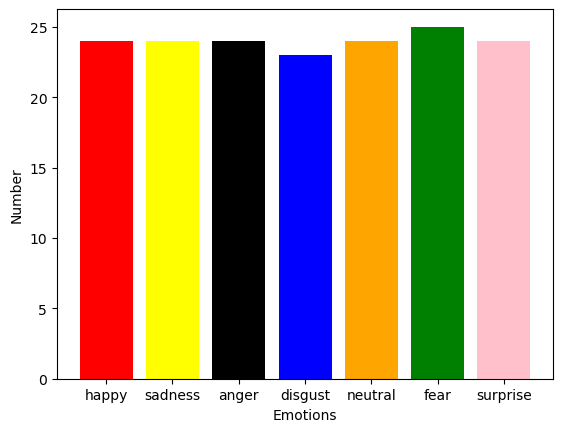

In [15]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)


#conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')





In [16]:

# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)


Epoch 1/500
3/3 [==============================] - 12s 3s/step - loss: 2.8669 - accuracy: 0.1667 - val_loss: 5.8118 - val_accuracy: 0.1333
Epoch 2/500
3/3 [==============================] - 2s 498ms/step - loss: 2.6926 - accuracy: 0.1369 - val_loss: 7.0788 - val_accuracy: 0.1333
Epoch 3/500
3/3 [==============================] - 2s 504ms/step - loss: 2.3147 - accuracy: 0.1845 - val_loss: 16.2544 - val_accuracy: 0.1556
Epoch 4/500
3/3 [==============================] - 2s 667ms/step - loss: 2.3386 - accuracy: 0.2560 - val_loss: 16.2403 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 486ms/step - loss: 2.3532 - accuracy: 0.2262 - val_loss: 15.9475 - val_accuracy: 0.1556
Epoch 6/500
3/3 [==============================] - 2s 500ms/step - loss: 2.1203 - accuracy: 0.2738 - val_loss: 18.7085 - val_accuracy: 0.0667
Epoch 7/500
3/3 [==============================] - 2s 675ms/step - loss: 2.2094 - accuracy: 0.2381 - val_loss: 23.5295 - val_accuracy: 0.1111
Epoch 8/50

3/3 [==============================] - 2s 494ms/step - loss: 1.4633 - accuracy: 0.4524 - val_loss: 6.1694 - val_accuracy: 0.2444
Epoch 59/500
3/3 [==============================] - 2s 491ms/step - loss: 1.2139 - accuracy: 0.5595 - val_loss: 6.3414 - val_accuracy: 0.1111
Epoch 60/500
3/3 [==============================] - 2s 643ms/step - loss: 1.4603 - accuracy: 0.4702 - val_loss: 5.8758 - val_accuracy: 0.0889
Epoch 61/500
3/3 [==============================] - 2s 643ms/step - loss: 1.4228 - accuracy: 0.5357 - val_loss: 5.9658 - val_accuracy: 0.1333
Epoch 62/500
3/3 [==============================] - 2s 650ms/step - loss: 1.3507 - accuracy: 0.5060 - val_loss: 6.7583 - val_accuracy: 0.1556
Epoch 63/500
3/3 [==============================] - 2s 648ms/step - loss: 1.2621 - accuracy: 0.5060 - val_loss: 7.0747 - val_accuracy: 0.1556
Epoch 64/500
3/3 [==============================] - 2s 494ms/step - loss: 1.2039 - accuracy: 0.5774 - val_loss: 7.3806 - val_accuracy: 0.1556
Epoch 65/500
3/3 [=

Epoch 116/500
3/3 [==============================] - 2s 502ms/step - loss: 1.0069 - accuracy: 0.6488 - val_loss: 2.3942 - val_accuracy: 0.4444
Epoch 117/500
3/3 [==============================] - 2s 498ms/step - loss: 0.8684 - accuracy: 0.6548 - val_loss: 2.1772 - val_accuracy: 0.5111
Epoch 118/500
3/3 [==============================] - 2s 489ms/step - loss: 0.8914 - accuracy: 0.6369 - val_loss: 2.1533 - val_accuracy: 0.4889
Epoch 119/500
3/3 [==============================] - 2s 496ms/step - loss: 0.9766 - accuracy: 0.6488 - val_loss: 2.1185 - val_accuracy: 0.4667
Epoch 120/500
3/3 [==============================] - 2s 507ms/step - loss: 0.9768 - accuracy: 0.6429 - val_loss: 1.8761 - val_accuracy: 0.4889
Epoch 121/500
3/3 [==============================] - 2s 500ms/step - loss: 0.9594 - accuracy: 0.6369 - val_loss: 1.8613 - val_accuracy: 0.4444
Epoch 122/500
3/3 [==============================] - 2s 652ms/step - loss: 1.0047 - accuracy: 0.6429 - val_loss: 1.3745 - val_accuracy: 0.4889

3/3 [==============================] - 2s 498ms/step - loss: 0.6887 - accuracy: 0.7560 - val_loss: 44.4843 - val_accuracy: 0.1556
Epoch 174/500
3/3 [==============================] - 2s 504ms/step - loss: 0.7351 - accuracy: 0.7083 - val_loss: 21.7815 - val_accuracy: 0.1778
Epoch 175/500
3/3 [==============================] - 2s 505ms/step - loss: 0.7639 - accuracy: 0.7262 - val_loss: 13.1225 - val_accuracy: 0.2667
Epoch 176/500
3/3 [==============================] - 2s 490ms/step - loss: 0.7665 - accuracy: 0.7143 - val_loss: 12.7371 - val_accuracy: 0.2222
Epoch 177/500
3/3 [==============================] - 2s 496ms/step - loss: 0.7744 - accuracy: 0.7143 - val_loss: 11.8375 - val_accuracy: 0.2000
Epoch 178/500
3/3 [==============================] - 2s 645ms/step - loss: 0.8230 - accuracy: 0.7202 - val_loss: 10.1872 - val_accuracy: 0.2222
Epoch 179/500
3/3 [==============================] - 2s 494ms/step - loss: 0.6599 - accuracy: 0.7619 - val_loss: 9.3973 - val_accuracy: 0.2222
Epoch 1

3/3 [==============================] - 2s 644ms/step - loss: 0.6164 - accuracy: 0.7321 - val_loss: 1.1305 - val_accuracy: 0.6444
Epoch 231/500
3/3 [==============================] - 2s 646ms/step - loss: 0.7218 - accuracy: 0.7500 - val_loss: 1.0599 - val_accuracy: 0.7333
Epoch 232/500
3/3 [==============================] - 2s 645ms/step - loss: 0.6058 - accuracy: 0.7560 - val_loss: 1.0474 - val_accuracy: 0.6889
Epoch 233/500
3/3 [==============================] - 2s 642ms/step - loss: 0.6063 - accuracy: 0.7679 - val_loss: 1.1712 - val_accuracy: 0.7333
Epoch 234/500
3/3 [==============================] - 2s 500ms/step - loss: 0.7255 - accuracy: 0.7262 - val_loss: 1.4975 - val_accuracy: 0.5778
Epoch 235/500
3/3 [==============================] - 2s 502ms/step - loss: 0.6689 - accuracy: 0.7500 - val_loss: 1.5781 - val_accuracy: 0.5333
Epoch 236/500
3/3 [==============================] - 2s 492ms/step - loss: 0.7416 - accuracy: 0.7381 - val_loss: 1.7560 - val_accuracy: 0.5556
Epoch 237/500

3/3 [==============================] - 2s 492ms/step - loss: 0.6536 - accuracy: 0.7560 - val_loss: 1.4726 - val_accuracy: 0.5111
Epoch 288/500
3/3 [==============================] - 2s 491ms/step - loss: 0.6974 - accuracy: 0.7321 - val_loss: 1.3288 - val_accuracy: 0.6444
Epoch 289/500
3/3 [==============================] - 2s 648ms/step - loss: 0.5031 - accuracy: 0.8155 - val_loss: 1.6166 - val_accuracy: 0.6000
Epoch 290/500
3/3 [==============================] - 2s 651ms/step - loss: 0.6755 - accuracy: 0.7560 - val_loss: 2.2913 - val_accuracy: 0.4222
Epoch 291/500
3/3 [==============================] - 2s 489ms/step - loss: 0.5669 - accuracy: 0.7976 - val_loss: 2.5566 - val_accuracy: 0.4222
Epoch 292/500
3/3 [==============================] - 2s 651ms/step - loss: 0.6176 - accuracy: 0.7738 - val_loss: 2.6974 - val_accuracy: 0.4444
Epoch 293/500
3/3 [==============================] - 2s 500ms/step - loss: 0.6029 - accuracy: 0.7440 - val_loss: 2.1616 - val_accuracy: 0.4444
Epoch 294/500

3/3 [==============================] - 2s 635ms/step - loss: 0.4673 - accuracy: 0.8452 - val_loss: 5.7501 - val_accuracy: 0.3111
Epoch 345/500
3/3 [==============================] - 2s 487ms/step - loss: 0.5158 - accuracy: 0.8155 - val_loss: 6.6079 - val_accuracy: 0.2889
Epoch 346/500
3/3 [==============================] - 2s 644ms/step - loss: 0.6247 - accuracy: 0.8036 - val_loss: 7.4268 - val_accuracy: 0.2444
Epoch 347/500
3/3 [==============================] - 2s 490ms/step - loss: 0.5941 - accuracy: 0.7738 - val_loss: 4.5653 - val_accuracy: 0.3556
Epoch 348/500
3/3 [==============================] - 2s 640ms/step - loss: 0.5694 - accuracy: 0.8095 - val_loss: 3.3373 - val_accuracy: 0.5111
Epoch 349/500
3/3 [==============================] - 2s 503ms/step - loss: 0.6148 - accuracy: 0.7679 - val_loss: 3.0310 - val_accuracy: 0.6222
Epoch 350/500
3/3 [==============================] - 2s 651ms/step - loss: 0.4642 - accuracy: 0.8214 - val_loss: 3.1792 - val_accuracy: 0.5556
Epoch 351/500

3/3 [==============================] - 2s 496ms/step - loss: 0.3851 - accuracy: 0.8869 - val_loss: 3.6115 - val_accuracy: 0.3778
Epoch 402/500
3/3 [==============================] - 2s 501ms/step - loss: 0.5555 - accuracy: 0.7917 - val_loss: 4.1296 - val_accuracy: 0.3556
Epoch 403/500
3/3 [==============================] - 2s 491ms/step - loss: 0.5544 - accuracy: 0.7976 - val_loss: 3.8397 - val_accuracy: 0.3111
Epoch 404/500
3/3 [==============================] - 2s 492ms/step - loss: 0.5359 - accuracy: 0.7798 - val_loss: 3.3933 - val_accuracy: 0.4222
Epoch 405/500
3/3 [==============================] - 2s 642ms/step - loss: 0.6138 - accuracy: 0.8155 - val_loss: 3.3389 - val_accuracy: 0.4889
Epoch 406/500
3/3 [==============================] - 2s 642ms/step - loss: 0.5613 - accuracy: 0.8274 - val_loss: 3.2370 - val_accuracy: 0.4667
Epoch 407/500
3/3 [==============================] - 2s 491ms/step - loss: 0.6055 - accuracy: 0.7738 - val_loss: 3.3617 - val_accuracy: 0.4000
Epoch 408/500

3/3 [==============================] - 2s 647ms/step - loss: 0.4764 - accuracy: 0.8214 - val_loss: 2.1582 - val_accuracy: 0.4889
Epoch 459/500
3/3 [==============================] - 2s 492ms/step - loss: 0.5299 - accuracy: 0.8214 - val_loss: 2.1919 - val_accuracy: 0.4444
Epoch 460/500
3/3 [==============================] - 2s 646ms/step - loss: 0.4185 - accuracy: 0.8452 - val_loss: 1.6109 - val_accuracy: 0.6667
Epoch 461/500
3/3 [==============================] - 2s 492ms/step - loss: 0.5160 - accuracy: 0.8095 - val_loss: 1.2625 - val_accuracy: 0.7111
Epoch 462/500
3/3 [==============================] - 2s 507ms/step - loss: 0.4366 - accuracy: 0.8274 - val_loss: 1.2782 - val_accuracy: 0.7111
Epoch 463/500
3/3 [==============================] - 2s 508ms/step - loss: 0.4742 - accuracy: 0.8214 - val_loss: 1.2485 - val_accuracy: 0.6667
Epoch 464/500
3/3 [==============================] - 2s 648ms/step - loss: 0.4595 - accuracy: 0.8214 - val_loss: 1.2860 - val_accuracy: 0.6667
Epoch 465/500

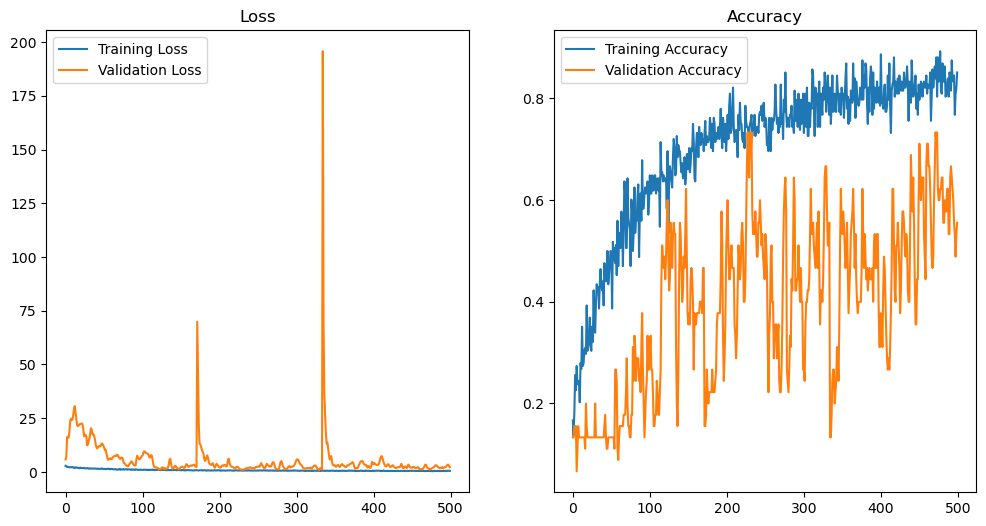

In [17]:

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [18]:
#FER2013VGG19---EXP1

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [20]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 19s 77ms/step - loss: 2.4289 - accuracy: 0.2003 - val_loss: 1.8565 - val_accuracy: 0.2598
Epoch 2/500
225/225 [==============================] - 15s 66ms/step - loss: 2.1739 - accuracy: 0.2409 - val_loss: 1.7436 - val_accuracy: 0.3406
Epoch 3/500
225/225 [==============================] - 15s 66ms/step - loss: 2.0609 - accuracy: 0.2545 - val_loss: 1.7200 - val_accuracy: 0.3391
Epoch 4/500
225/225 [==============================] - 15s 67ms/step - loss: 1.9900 - accuracy: 0.2679 - val_loss: 1.6899 - val_accuracy: 0.3455
Epoch 5/500
225/225 [==============================] - 15s 67ms/step - loss: 1.9507 - accuracy: 0.2778 - val_loss: 1.6658 - val_accuracy: 0.3541
Epoch 6/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9096 - accuracy: 0.2796 - val_loss: 1.6602 - val_accuracy: 0.3530
Epoch 7/500
225/225 [==============================] - 15s 66ms/step - loss: 1.8781 - accuracy: 0.2861 - val_loss: 1.6404 - val_ac

225/225 [==============================] - 16s 70ms/step - loss: 1.5750 - accuracy: 0.3787 - val_loss: 1.5414 - val_accuracy: 0.3885
Epoch 58/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5750 - accuracy: 0.3809 - val_loss: 1.5336 - val_accuracy: 0.3969
Epoch 59/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5745 - accuracy: 0.3792 - val_loss: 1.5261 - val_accuracy: 0.4028
Epoch 60/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5698 - accuracy: 0.3863 - val_loss: 1.5307 - val_accuracy: 0.3986
Epoch 61/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5714 - accuracy: 0.3828 - val_loss: 1.5337 - val_accuracy: 0.3937
Epoch 62/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5674 - accuracy: 0.3856 - val_loss: 1.5350 - val_accuracy: 0.3936
Epoch 63/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5696 - accuracy: 0.3841 - val_loss: 1.5257 - val_accuracy

225/225 [==============================] - 15s 66ms/step - loss: 1.5232 - accuracy: 0.4042 - val_loss: 1.5078 - val_accuracy: 0.4152
Epoch 114/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5250 - accuracy: 0.4075 - val_loss: 1.5044 - val_accuracy: 0.4140
Epoch 115/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5262 - accuracy: 0.4044 - val_loss: 1.5163 - val_accuracy: 0.4099
Epoch 116/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5233 - accuracy: 0.4030 - val_loss: 1.5120 - val_accuracy: 0.4082
Epoch 117/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5221 - accuracy: 0.4048 - val_loss: 1.5051 - val_accuracy: 0.4147
Epoch 118/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5203 - accuracy: 0.4056 - val_loss: 1.5132 - val_accuracy: 0.4092
Epoch 119/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5250 - accuracy: 0.4040 - val_loss: 1.5083 - val_ac

Epoch 169/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4980 - accuracy: 0.4181 - val_loss: 1.4985 - val_accuracy: 0.4203
Epoch 170/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4963 - accuracy: 0.4184 - val_loss: 1.5029 - val_accuracy: 0.4214
Epoch 171/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4954 - accuracy: 0.4176 - val_loss: 1.5004 - val_accuracy: 0.4171
Epoch 172/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4903 - accuracy: 0.4199 - val_loss: 1.4912 - val_accuracy: 0.4207
Epoch 173/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4932 - accuracy: 0.4194 - val_loss: 1.5107 - val_accuracy: 0.4140
Epoch 174/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4928 - accuracy: 0.4192 - val_loss: 1.5007 - val_accuracy: 0.4171
Epoch 175/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4942 - accuracy: 0.4159 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4787 - accuracy: 0.4231 - val_loss: 1.5050 - val_accuracy: 0.4203
Epoch 226/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4715 - accuracy: 0.4266 - val_loss: 1.4997 - val_accuracy: 0.4246
Epoch 227/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4719 - accuracy: 0.4301 - val_loss: 1.5049 - val_accuracy: 0.4210
Epoch 228/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4735 - accuracy: 0.4258 - val_loss: 1.4943 - val_accuracy: 0.4250
Epoch 229/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4716 - accuracy: 0.4258 - val_loss: 1.4967 - val_accuracy: 0.4235
Epoch 230/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4791 - accuracy: 0.4247 - val_loss: 1.5060 - val_accuracy: 0.4235
Epoch 231/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4693 - accuracy: 0.4308 - val_loss: 1

225/225 [==============================] - 36s 161ms/step - loss: 1.4583 - accuracy: 0.4316 - val_loss: 1.4919 - val_accuracy: 0.4295
Epoch 281/500
225/225 [==============================] - 33s 145ms/step - loss: 1.4576 - accuracy: 0.4365 - val_loss: 1.5032 - val_accuracy: 0.4248
Epoch 282/500
225/225 [==============================] - 28s 124ms/step - loss: 1.4557 - accuracy: 0.4326 - val_loss: 1.4996 - val_accuracy: 0.4188
Epoch 283/500
225/225 [==============================] - 38s 169ms/step - loss: 1.4637 - accuracy: 0.4332 - val_loss: 1.4917 - val_accuracy: 0.4273
Epoch 284/500
225/225 [==============================] - 33s 146ms/step - loss: 1.4585 - accuracy: 0.4306 - val_loss: 1.4922 - val_accuracy: 0.4230
Epoch 285/500
225/225 [==============================] - 36s 160ms/step - loss: 1.4574 - accuracy: 0.4358 - val_loss: 1.5046 - val_accuracy: 0.4278
Epoch 286/500
225/225 [==============================] - 53s 234ms/step - loss: 1.4552 - accuracy: 0.4353 - val_loss: 1.4956 -

Epoch 336/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4462 - accuracy: 0.4388 - val_loss: 1.4843 - val_accuracy: 0.4333
Epoch 337/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4405 - accuracy: 0.4429 - val_loss: 1.4957 - val_accuracy: 0.4301
Epoch 338/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4466 - accuracy: 0.4401 - val_loss: 1.5077 - val_accuracy: 0.4269
Epoch 339/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4417 - accuracy: 0.4422 - val_loss: 1.4908 - val_accuracy: 0.4283
Epoch 340/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4457 - accuracy: 0.4388 - val_loss: 1.4957 - val_accuracy: 0.4245
Epoch 341/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4359 - accuracy: 0.4423 - val_loss: 1.4999 - val_accuracy: 0.4264
Epoch 342/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4384 - accuracy: 0.4431 - val_loss: 1

Epoch 392/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4329 - accuracy: 0.4428 - val_loss: 1.4981 - val_accuracy: 0.4312
Epoch 393/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4291 - accuracy: 0.4460 - val_loss: 1.4978 - val_accuracy: 0.4324
Epoch 394/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4294 - accuracy: 0.4476 - val_loss: 1.4904 - val_accuracy: 0.4342
Epoch 395/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4228 - accuracy: 0.4478 - val_loss: 1.4913 - val_accuracy: 0.4329
Epoch 396/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4348 - accuracy: 0.4440 - val_loss: 1.4898 - val_accuracy: 0.4361
Epoch 397/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4312 - accuracy: 0.4454 - val_loss: 1.4874 - val_accuracy: 0.4315
Epoch 398/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4291 - accuracy: 0.4471 - val_loss: 1

Epoch 448/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4206 - accuracy: 0.4488 - val_loss: 1.4990 - val_accuracy: 0.4368
Epoch 449/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4194 - accuracy: 0.4510 - val_loss: 1.4993 - val_accuracy: 0.4377
Epoch 450/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4141 - accuracy: 0.4547 - val_loss: 1.4951 - val_accuracy: 0.4380
Epoch 451/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4219 - accuracy: 0.4493 - val_loss: 1.4951 - val_accuracy: 0.4351
Epoch 452/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4200 - accuracy: 0.4503 - val_loss: 1.4845 - val_accuracy: 0.4386
Epoch 453/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4216 - accuracy: 0.4488 - val_loss: 1.4907 - val_accuracy: 0.4351
Epoch 454/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4164 - accuracy: 0.4506 - val_loss: 1

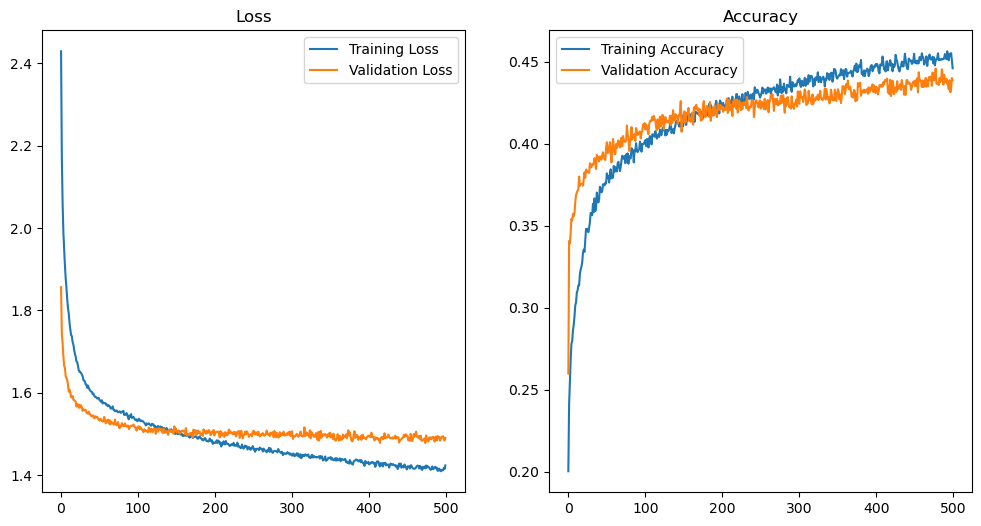

In [21]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [22]:
#ferresnet---EXP1

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 64

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')



from keras.applications.resnet import ResNet152
base_model = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [24]:

# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
449/449 [==============================] - 36s 67ms/step - loss: 2.3689 - accuracy: 0.1850 - val_loss: 1.9612 - val_accuracy: 0.2485
Epoch 2/500
449/449 [==============================] - 31s 69ms/step - loss: 2.1660 - accuracy: 0.2110 - val_loss: 1.9733 - val_accuracy: 0.2265
Epoch 3/500
449/449 [==============================] - 28s 62ms/step - loss: 2.0768 - accuracy: 0.2269 - val_loss: 1.8521 - val_accuracy: 0.2664
Epoch 4/500
449/449 [==============================] - 31s 69ms/step - loss: 2.0198 - accuracy: 0.2348 - val_loss: 1.8380 - val_accuracy: 0.2594
Epoch 5/500
449/449 [==============================] - 28s 61ms/step - loss: 1.9819 - accuracy: 0.2433 - val_loss: 1.9663 - val_accuracy: 0.2616
Epoch 6/500
449/449 [==============================] - 29s 65ms/step - loss: 1.9517 - accuracy: 0.2476 - val_loss: 1.7538 - val_accuracy: 0.2972
Epoch 7/500
449/449 [==============================] - 31s 69ms/step - loss: 1.9216 - accuracy: 0.2507 - val_loss: 1.7207 - val_ac

449/449 [==============================] - 17s 38ms/step - loss: 1.6740 - accuracy: 0.3334 - val_loss: 1.8313 - val_accuracy: 0.2558
Epoch 58/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6751 - accuracy: 0.3388 - val_loss: 2.1177 - val_accuracy: 0.1739
Epoch 59/500
449/449 [==============================] - 17s 39ms/step - loss: 1.6736 - accuracy: 0.3378 - val_loss: 1.6125 - val_accuracy: 0.3699
Epoch 60/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6703 - accuracy: 0.3370 - val_loss: 1.8321 - val_accuracy: 0.2742
Epoch 61/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6723 - accuracy: 0.3355 - val_loss: 1.6712 - val_accuracy: 0.3420
Epoch 62/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6717 - accuracy: 0.3400 - val_loss: 1.6833 - val_accuracy: 0.3378
Epoch 63/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6718 - accuracy: 0.3360 - val_loss: 1.7058 - val_accuracy

449/449 [==============================] - 17s 38ms/step - loss: 1.6445 - accuracy: 0.3503 - val_loss: 1.6494 - val_accuracy: 0.3313
Epoch 114/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6448 - accuracy: 0.3502 - val_loss: 2.2529 - val_accuracy: 0.2672
Epoch 115/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6485 - accuracy: 0.3474 - val_loss: 1.6091 - val_accuracy: 0.3663
Epoch 116/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6464 - accuracy: 0.3478 - val_loss: 1.7300 - val_accuracy: 0.3084
Epoch 117/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6428 - accuracy: 0.3484 - val_loss: 1.6293 - val_accuracy: 0.3686
Epoch 118/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6438 - accuracy: 0.3504 - val_loss: 1.6004 - val_accuracy: 0.3738
Epoch 119/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6395 - accuracy: 0.3532 - val_loss: 1.7246 - val_ac

Epoch 169/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6336 - accuracy: 0.3542 - val_loss: 1.6298 - val_accuracy: 0.3615
Epoch 170/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6320 - accuracy: 0.3558 - val_loss: 1.5949 - val_accuracy: 0.3709
Epoch 171/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6322 - accuracy: 0.3578 - val_loss: 1.6738 - val_accuracy: 0.3355
Epoch 172/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6331 - accuracy: 0.3530 - val_loss: 1.6048 - val_accuracy: 0.3625
Epoch 173/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6311 - accuracy: 0.3618 - val_loss: 1.6238 - val_accuracy: 0.3589
Epoch 174/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6314 - accuracy: 0.3594 - val_loss: 1.6572 - val_accuracy: 0.3307
Epoch 175/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6319 - accuracy: 0.3578 - val_loss: 1

Epoch 225/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6236 - accuracy: 0.3615 - val_loss: 1.6316 - val_accuracy: 0.3543
Epoch 226/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6216 - accuracy: 0.3584 - val_loss: 1.6012 - val_accuracy: 0.3736
Epoch 227/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6202 - accuracy: 0.3655 - val_loss: 1.5651 - val_accuracy: 0.3835
Epoch 228/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6191 - accuracy: 0.3648 - val_loss: 1.7140 - val_accuracy: 0.3084
Epoch 229/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6197 - accuracy: 0.3638 - val_loss: 1.6079 - val_accuracy: 0.3768
Epoch 230/500
449/449 [==============================] - 17s 39ms/step - loss: 1.6231 - accuracy: 0.3619 - val_loss: 1.5950 - val_accuracy: 0.3735
Epoch 231/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6203 - accuracy: 0.3623 - val_loss: 1

Epoch 281/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6178 - accuracy: 0.3622 - val_loss: 1.6336 - val_accuracy: 0.3603
Epoch 282/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6174 - accuracy: 0.3629 - val_loss: 1.6292 - val_accuracy: 0.3526
Epoch 283/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6129 - accuracy: 0.3641 - val_loss: 1.5530 - val_accuracy: 0.3975
Epoch 284/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6146 - accuracy: 0.3633 - val_loss: 1.6753 - val_accuracy: 0.3491
Epoch 285/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6141 - accuracy: 0.3636 - val_loss: 1.7375 - val_accuracy: 0.3445
Epoch 286/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6146 - accuracy: 0.3666 - val_loss: 1.5361 - val_accuracy: 0.3916
Epoch 287/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6168 - accuracy: 0.3640 - val_loss: 1

Epoch 337/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6092 - accuracy: 0.3623 - val_loss: 1.5558 - val_accuracy: 0.3947
Epoch 338/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6112 - accuracy: 0.3691 - val_loss: 1.5577 - val_accuracy: 0.3899
Epoch 339/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6138 - accuracy: 0.3670 - val_loss: 1.5407 - val_accuracy: 0.4042
Epoch 340/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6098 - accuracy: 0.3664 - val_loss: 1.6704 - val_accuracy: 0.3537
Epoch 341/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6118 - accuracy: 0.3675 - val_loss: 1.8099 - val_accuracy: 0.2905
Epoch 342/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6156 - accuracy: 0.3654 - val_loss: 1.5817 - val_accuracy: 0.3681
Epoch 343/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6086 - accuracy: 0.3692 - val_loss: 1

Epoch 393/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6066 - accuracy: 0.3709 - val_loss: 1.5314 - val_accuracy: 0.3961
Epoch 394/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6079 - accuracy: 0.3707 - val_loss: 1.6194 - val_accuracy: 0.3728
Epoch 395/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6075 - accuracy: 0.3699 - val_loss: 1.6693 - val_accuracy: 0.3451
Epoch 396/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6081 - accuracy: 0.3678 - val_loss: 1.5890 - val_accuracy: 0.3787
Epoch 397/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6066 - accuracy: 0.3691 - val_loss: 1.5939 - val_accuracy: 0.3617
Epoch 398/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6084 - accuracy: 0.3715 - val_loss: 1.5692 - val_accuracy: 0.3918
Epoch 399/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6063 - accuracy: 0.3683 - val_loss: 1

Epoch 449/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6064 - accuracy: 0.3695 - val_loss: 1.5828 - val_accuracy: 0.3787
Epoch 450/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6036 - accuracy: 0.3731 - val_loss: 1.7291 - val_accuracy: 0.2910
Epoch 451/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6042 - accuracy: 0.3669 - val_loss: 1.5507 - val_accuracy: 0.3952
Epoch 452/500
449/449 [==============================] - 17s 38ms/step - loss: 1.5989 - accuracy: 0.3710 - val_loss: 1.6543 - val_accuracy: 0.3809
Epoch 453/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6059 - accuracy: 0.3703 - val_loss: 1.5625 - val_accuracy: 0.3844
Epoch 454/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6042 - accuracy: 0.3710 - val_loss: 1.6250 - val_accuracy: 0.3640
Epoch 455/500
449/449 [==============================] - 17s 38ms/step - loss: 1.6072 - accuracy: 0.3672 - val_loss: 1

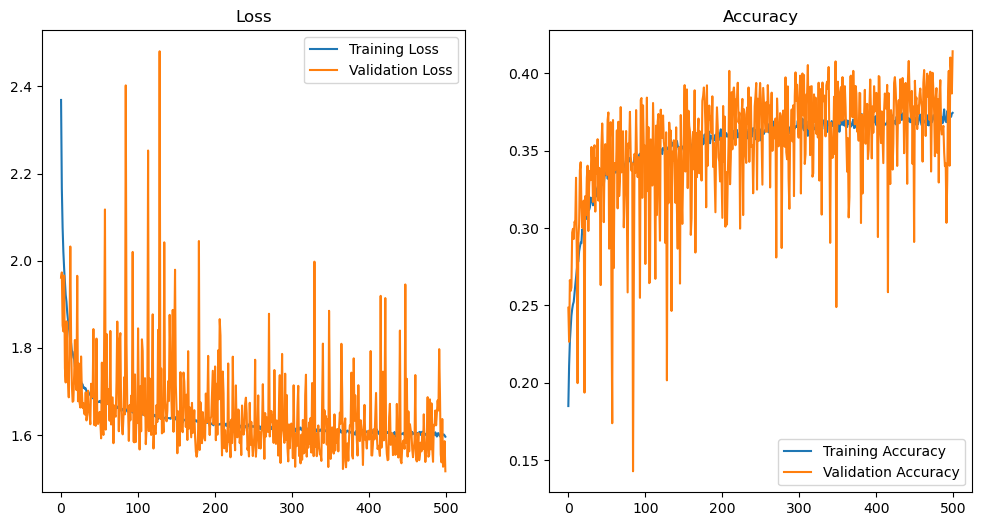

In [25]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()